<a href="https://colab.research.google.com/github/laks58/Advertising/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [3]:
import pandas as pd
df = pd.read_csv("/content/Advertising.csv")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from prophet import Prophet

In [5]:
if "Unnamed: 0" in df.columns:
    df.drop("Unnamed: 0", axis=1, inplace=True)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Data Exploration & Visualization

In [7]:
# Check missing values
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


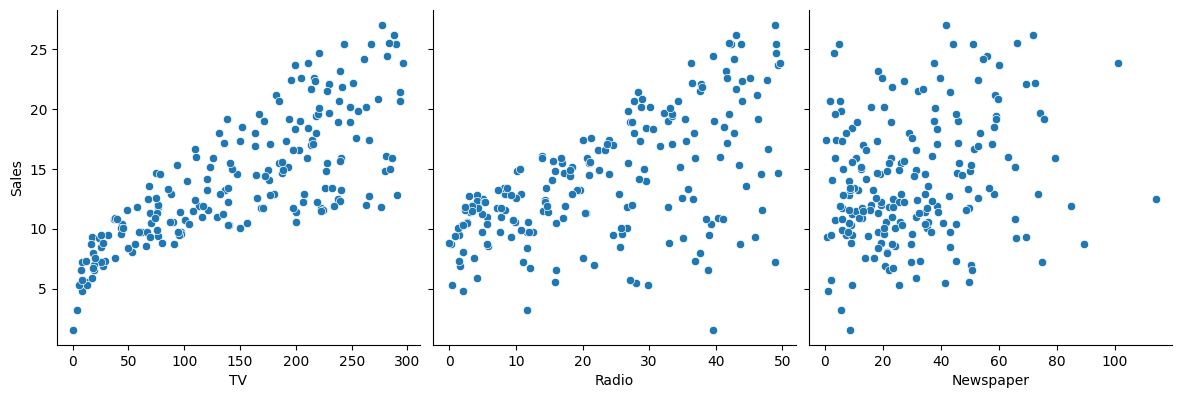

In [8]:
# Pairplot to see relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1)
plt.show()



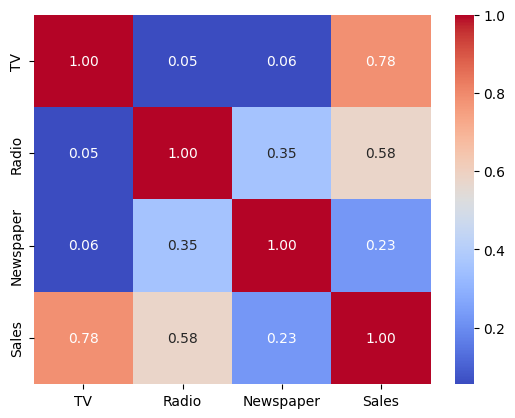

In [9]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Regression Model (Sales vs Advertising Spend)

In [11]:
# Features & Target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.899438024100912
Mean Squared Error: 3.1740973539761033


In [16]:
# Coefficients (Impact of Ads)
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\nImpact of Advertising Channels on Sales:\n", coef_df)


Impact of Advertising Channels on Sales:
            Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


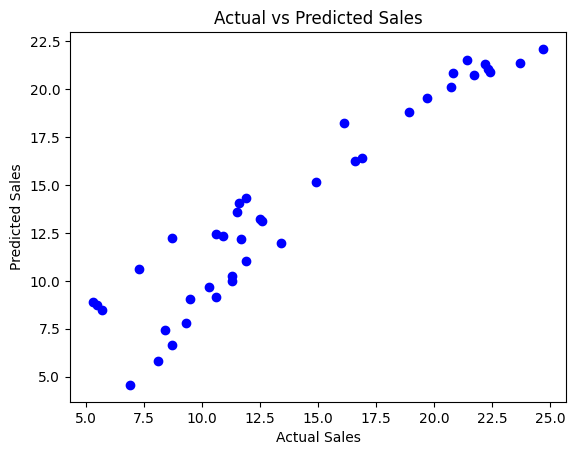

In [17]:
# Plot Actual vs Predicted
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

Future Sales Prediction Example

In [18]:
# Predict new sales based on ad spend
new_data = pd.DataFrame({
    'TV': [200, 50],
    'Radio': [25, 40],
    'Newspaper': [20, 30]
})

future_sales = model.predict(new_data)
print("\nFuture Predictions:\n", future_sales)



Future Predictions:
 [16.71006947 12.86617881]


Time Series Forecasting with Prophet

In [19]:
# Create a fake date column for time series (if dataset has no dates)
df_ts = df.copy()
df_ts['Date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

In [20]:
# Prophet needs 'ds' (date) and 'y' (target)
ts = df_ts[['Date', 'Sales']].rename(columns={"Date": "ds", "Sales": "y"})

In [21]:
# Train Prophet model
m = Prophet()
m.fit(ts)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzstrkeqx/by4y2xj6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzstrkeqx/sh873clr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25732', 'data', 'file=/tmp/tmpzstrkeqx/by4y2xj6.json', 'init=/tmp/tmpzstrkeqx/sh873clr.json', 'output', 'file=/tmp/tmpzstrkeqx/prophet_modelapf6riy_/prophet_model-20250907121521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:15:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:15:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
# Forecast for next 30 days
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

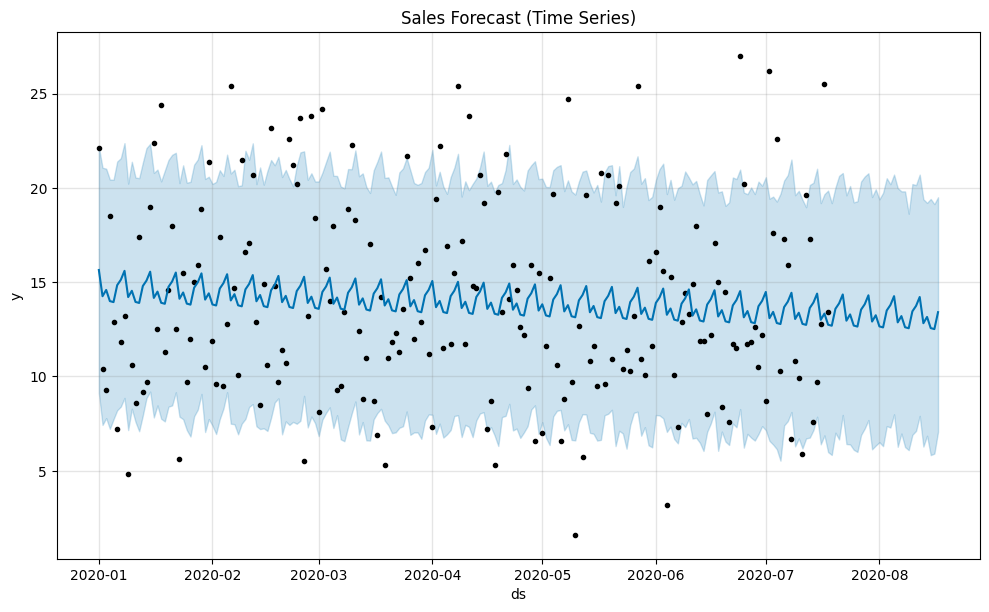

In [23]:
# Plot forecast
fig1 = m.plot(forecast)
plt.title("Sales Forecast (Time Series)")
plt.show()

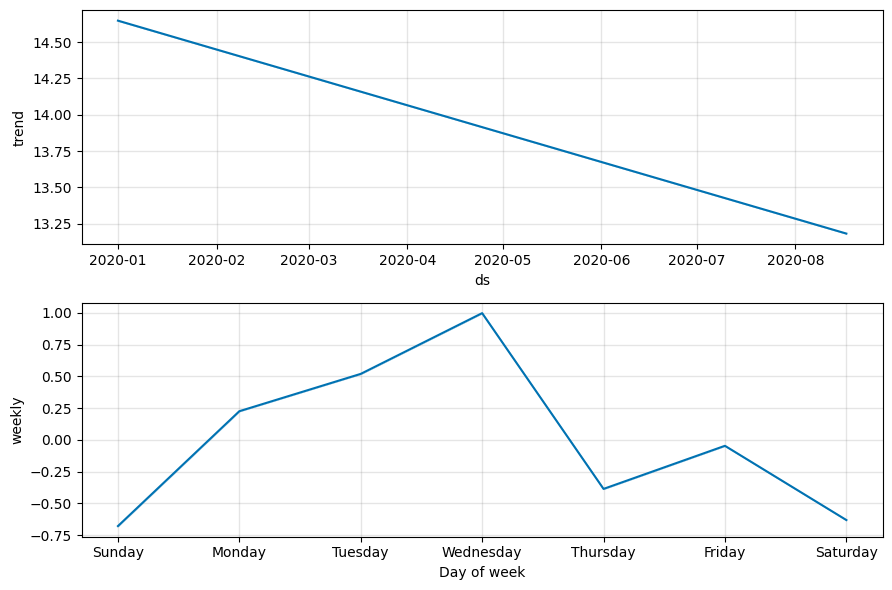

In [24]:
# Components (trend, seasonality)
fig2 = m.plot_components(forecast)
plt.show()